<a href="https://colab.research.google.com/github/elizabethho/Brew-ti-ful-Data/blob/main/Brew_ti_ful_Data_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Brew-ti-ful Data: Analyzing the characteristics of specialty Arabica coffee
## Elizabeth Ho, Hanna Mitschke, and Sam Stone

In [ ]:
import re
from sklearn import cluster
from google.colab import files
from sklearn.decomposition import PCA

# Overview and Motivation

Coffee is one of the most popular drinks in the world. More than 400 billion cups are consumed each year and more than 450 million cups of coffee are consumed in the United States each day. Over 50% of people over 18 drink coffee everyday in the United States alone. Through our analysis of coffee and different coffee characteristics, we hope to help inform coffee drinkers about what makes the best and the highest quality coffee, so that they can use this information to seek out high quality coffee that may match their coffee interests and standards. In addition, our analysis could be used by companies that are either interested in entering the coffee market or in improving their current market share in the coffee market since the coffee industry is very competitive. These businesses could potentially benefit by utilizing the characteristics that we discover lead to higher quality coffee.

Our original goals were to use the other information that is provided in the data to be able to infer the total quality score, but due to data limitations we were not able to do this.  Instead we changed our goals to be more exploratory and wanted to see if we could find trends that could help consumers know what to look for when deciding on what coffee to drink, help coffee bean wholesalers recognize indications of high quality coffee, and help farmers get a better idea of what might improve their coffee bean harvest. We wanted to figure out what kinds of conditions are the most important to making successful and high quality coffee.


# Related Work

Since we didn't really have a topic in mind, we started our project by looking at a ton of different datasets online including many from fivethirtyeight, Kaggle, and several other sources. We were looking for something we thought would be fun and interesting, and which would allow us to  learn more about the topic in addition to just exploring the data collected about it. In class, we talked about linear regression and classification, and we found those topics interesting so we wanted to use a dataset where we could predict something given other information. We also really liked the diamonds homework assignment, so that was a big inspiration for the kind of data science techniques and tools we wanted to use in our project. After looking for many hours, we narrowed it down to one dataset about chocolate and one about coffee quality scores. We picked coffee because Hanna LOVES coffee and drinks it every day like many other college students, so this topic seemed very relevant for both ourselves and our audience. It also met the requirement that it should be a topic that we were interested in exploring and learning more about, especially the scoring and rating aspects of coffee since we didn't realize how structured yet complex it is to determine coffee quality. We liked the idea of trying to predict information about the coffee, like its total quality score, given the other information that we had in the dataset. Unfortunately, our project ended up taking a different direction because of certain aspects about the data that we did not realize until after we chose it.

# Initial Questions

At the beginning of the project, our first questions were related to how we might predict the quality scores of a coffee and if we could figure out what coffee characteristics were the most important to determining what makes high quality speciality coffee. When we learned that the total coffee quality score provided with each coffee review was just the sum of the 10 different flavor attributes included in the dataset, our focus turned to more exploratory data analysis such as finding trends and correlations that may be present within the data.

We wanted to figure out if there was a correlation between the amount of moisture and the total quality score. Additionally we were curious about what type of correlations might be present between the total quality score and the processing method or altitude features of the data. In general, we wanted to know about correlations between the flavor attributes themselves, as well as what correlations may exist between the flavor attributes and other features of the dataset such as coffee variety, region or country of origin, altitude, and processing method. We also had questions about what trends or patterns may be found among individual features of the dataset. For example, we wanted to know about what trends might be occurring related to the coffee varieties and the coffee’s country or region of origin.

# Data

We got the original data from https://github.com/jldbc/coffee-quality-database (we used data\arabica_data_cleaned.csv). They scraped Coffee Quality Institute's online database using a Selenium headless browser and Beautiful Soup. The data contains 1312 reviews of Arabica coffee beans from the Coffee Quality Institute's trained expert reviewers. These reviewers used the Specialty Coffee Association of America’s standards to assess coffee quality. These guidelines try to make the tasting and scoring of coffee as standardized and unbiased as possible.

We used the cleaned version of the data which was made up of 44 features. The features include 10 flavor quality measures (Aroma, Flavor, Aftertaste, Acidity, Body, Balance, Uniformity, Cup Cleanliness, Sweetness, Cupper Points) that were all scored out of a range of 0-10. There were also some other quality measures in the dataset like moisture, defects, and quakers. Each coffee review also included a Total Quality Score that was based on its quality measures, with the maximum possible score being 100. The features also include other coffee bean data, such as the processing method, variety, and color, as well as farm data, such as the country, owner, altitude, and farm name.

Below, we have provided some definitions to provide more clarity about what is used to score coffee (from: https://www.scaa.org/PDF/resources/cupping-protocols.pdf).
* Aroma - smell of dry ground coffee and of coffee when infused with hot water
* Flavor - intensity, quality and complexity of taste and aroma when coffee is tasted
* Aftertaste - length of positive flavor (taste and aroma) remaining after coffee is swallowed
* Acidity - brightness / sourness experienced when coffee is first sipped into the mouth
* Body - feeling of coffee in the mouth and on tongue
* Balance- how flavor, aftertaste, acidity, and body complement or contrast each other
* Uniformity - consistency of flavor in the cups of sample tested
* Cup Cleanliness - lack of interfering negative impressions throughout tasting from first ingestion to final aftertaste
* Sweetness - pleasing fullness of flavor and taste of sweetness
* Cupper Points - reviewer's personal overall score
* Moisture - moisture percentage of coffee bean after drying
* Category 1 Defects - more severe defects, include things like large or medium sticks or stones and full black or sour beans
* Category 2 Defects - less severe defects, include things like insect damage, small sticks or stones, and partial black or sour beans
* Quakers - unripened beans that are hard to identify during hand sorting

In [ ]:
# imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from numpy import mean
from sklearn.manifold import TSNE

In [ ]:
# read in dataset for GitHub
arabica_cleaned = pd.read_csv('https://raw.githubusercontent.com/elizabethho/Brew-ti-ful-Data/main/arabica_data_cleaned.csv')

In [ ]:
# cleaning!
if 'Lot.Number' in arabica_cleaned.columns:
  # remove columns we won't be using, these rows didn't seem relevant to our goals
  arabica_cleaned = arabica_cleaned.drop(arabica_cleaned.columns[0], axis=1)
  arabica_cleaned = arabica_cleaned.drop(['Lot.Number', 'ICO.Number', 'Certification.Address', 'Certification.Contact', 'unit_of_measurement', 'Species', 'Number.of.Bags', 'Bag.Weight', 'Altitude', 'altitude_low_meters', 'altitude_high_meters', 'Expiration', 'Owner','Farm.Name', 'Mill', 'Company', 'Producer', 'Owner.1', 'Region'], axis=1)

  # rename some columns for better clarity
  arabica_cleaned = arabica_cleaned.rename(columns={"Total.Cup.Points":"Total.Quality.Score", "altitude_mean_meters":"Altitude"})

  # remove rows that have no quality score
  arabica_cleaned.drop(arabica_cleaned[arabica_cleaned['Total.Quality.Score'] == 0].index, inplace = True)

  # remove harvest dates that have no numbers
  pattern = r'\d'
  arabica_cleaned = arabica_cleaned[arabica_cleaned['Harvest.Year'].str.match(pattern, na=False)]

  # remove rows that have any empty data
  arabica_cleaned.dropna(axis=0, how='any', inplace=True)

  # clean up harvest dates to just year
  for date in arabica_cleaned['Harvest.Year']:
    numeric_filter = filter(str.isdigit, date) # keep only the digits, used: https://www.kite.com/python/answers/how-to-remove-all-non-numeric-characters-from-a-string-in-python
    new_date = "".join(numeric_filter)
    if new_date.find("20") == 0:
      new_date = new_date[0:4] # take first 4 digits if '20' is at index 0
    else:
      new_date = "20" + new_date[len(new_date)-2:len(new_date)] # add '20' to last 2 digits
    arabica_cleaned['Harvest.Year'] = arabica_cleaned['Harvest.Year'].replace([date], new_date)

  # clean up grading dates to just year
  for date in arabica_cleaned['Grading.Date']:
    new_date = date.rstrip()[len(date)-4:len(date)] # take last 4 digits
    arabica_cleaned['Grading.Date'] = arabica_cleaned['Grading.Date'].replace([date], new_date)

  # only 1 remaining review from 2018, so we removed in order not to create conclusions on year based on 1 data point
  arabica_cleaned.drop(arabica_cleaned[arabica_cleaned['Harvest.Year'] == "2018"].index, inplace = True)

  # make harvest year and grading date a datetime
  arabica_cleaned['Harvest.Year'] = pd.to_datetime(arabica_cleaned['Harvest.Year'], format='%Y-%m-%d').dt.year
  arabica_cleaned['Grading.Date'] = pd.to_datetime(arabica_cleaned['Grading.Date'], format='%Y-%m-%d').dt.year

  # add new column with the region of the country of origin using dictionary
  arabica_cleaned['Region'] = arabica_cleaned['Country.of.Origin'].map(
    {'Costa Rica':'Central America', 'El Salvador':'Central America',
    'Guatemala':'Central America','Honduras':'Central America','Nicaragua':'Central America',
    'Mexico':'North America','United States':'North America','United States (Hawaii)':'North America',
    'Haiti':'North America','United States (Puerto Rico)':'North America',
    'Brazil':'South America','Colombia':'South America','Panama':'South America',
    'Peru':'South America','Ecuador':'South America',
    'China':'Asia','Taiwan':'Asia','Japan':'Asia','India':'Asia','Indonesia':'Asia','Laos':'Asia',
    'Myanmar':'Asia','Philippines':'Asia','Thailand':'Asia','Vietnam':'Asia','Papua New Guinea':'Asia',
    'Cote d?Ivoire':'Africa','Ethiopia':'Africa','Burundi':'Africa','Kenya':'Africa','Malawi':'Africa','Mauritius':'Africa',
    'Rwanda':'Africa','Uganda':'Africa','Tanzania, United Republic Of':'Africa','Zambia':'Africa'})

  # add new column with the variety group of the bean variety using dictionary
  arabica_cleaned['Variety.Group'] = arabica_cleaned['Variety'].map(
      {'Bourbon':'Bourbon','Caturra':'Bourbon','Pacas':'Bourbon','SL28':'Bourbon',
      'Yellow Bourbon':'Bourbon','Arusha':'Bourbon','Sulawesi':'Bourbon',
      'Mundo Novo':'Bourbon and Typica','Typica':'Typica','SL14':'Typica',
      'Mandheling':'Typica','SL34':'Typica','Blue Mountain':'Typica',
      'Sumatra':'Typica','Ruiru 11':'F1 Hybrids','Java':'Ethopian Landrace',
      'Catimor':'Introgressed','Other':'Other','Peaberry':'Other',
      'Ethiopian Heirlooms':'Other'})

  arabica_cleaned = arabica_cleaned.reset_index(drop=True)

arabica_cleaned.head()

,Country.of.Origin,In.Country.Partner,Harvest.Year,Grading.Date,Variety,Processing.Method,Aroma,Flavor,Aftertaste,Acidity,Body,Balance,Uniformity,Clean.Cup,Sweetness,Cupper.Points,Total.Quality.Score,Moisture,Category.One.Defects,Quakers,Color,Category.Two.Defects,Certification.Body,Altitude,Region,Variety.Group
0,Ethiopia,METAD Agricultural Development plc,2014,2015,Other,Washed / Wet,8.75,8.67,8.50,8.58,8.42,8.42,10.0,10.0,10.0,8.58,89.92,0.12,0,0.0,Green,1,METAD Agricultural Development plc,2075.0,Africa,Other
1,Ethiopia,METAD Agricultural Development plc,2014,2015,Other,Washed / Wet,8.25,8.50,8.25,8.50,8.42,8.33,10.0,10.0,10.0,8.58,88.83,0.12,0,0.0,Green,2,METAD Agricultural Development plc,2075.0,Africa,Other
2,Ethiopia,METAD Agricultural Development plc,2014,2015,Other,Natural / Dry,8.08,8.58,8.50,8.50,7.67,8.42,10.0,10.0,10.0,8.50,88.25,0.10,0,0.0,Green,4,METAD Agricultural Development plc,1822.5,Africa,Other
3,China,Yunnan Coffee Exchange,2015,2016,Catimor,Washed / Wet,8.42,8.25,8.08,8.17,7.92,8.00,10.0,10.0,10.0,8.42,87.25,0.10,0,0.0,Green,0,Yunnan Coffee Exchange,1450.0,Asia,Introgressed
4,United States,Almacafé,2014,2015,Other,Washed / Wet,8.00,8.25,8.08,8.50,8.25,8.00,10.0,10.0,10.0,8.17,87.25,0.00,0,0.0,None,0,Almacafé,2019.0,North America,Other


One of the first things that we did was clean the data set.  There were a lot of features that really didn't tell us any useful information at all.  For example, the original data set had things like "ICO Number", "Certification Contact", and "Lot Number." We went through and removed the features that we didn't think were going to help with our analysis. For some of the features, it was harder to tell if they were going to yield any useful information like "Bag Weight" or "Company."  We also renamed some columns in order to have better clarity, like changing "Total Cup Points" to "Total Quality Score" and "altitude mean meters" to "Altitude." After this, we removed rows that had a quality score of 0 or a non-numeric harvest or grading date. We also removed any rows that had blanks for any of the remaining features.

One column that was a bit challenging to clean up was the Harvest Year column. From visually inspecting the data, we could tell that this column contained a large variety of formats, and also that all the data was from the 21st century. Since we decided that we wanted to only keep the year, we got rid of data that didn't contain any digits like "August to December" and "May-August." We were able to group the remaining formats into 2 categories: those that had the year at the beginning and those that had the year at the end. This means that for ranges, like "2010-2011", we decided to keep the first year. For when "20" was found at the beginning, we simply just kept the first 4 digits.  Otherwise, we grabbed the last 2 digits and added "20" to the beginning, because there were some formats like "23-Jul-10" and "01/09." We also cleaned the Grading Date column, but this was a lot easier because all of these were in the same format (ex: "April 4th, 2015"), so we just had to save the last 4 digits of each.  We also converted these 2 columns to a datetime type.

In order to add more useful information, we created some of our own groupings.  We used a dictionary to assign every datapoint the corresponding Region based on its Country of Origin and the corresponding Variety Group based on its Variety.  We made new columns and added that information there.  We were hoping that by doing this, we could see some trends with these new groupings later on. To finish cleaning, we reset the indices to reflect the changes we made.

# Exploratory Data Analysis and Models
We used several different visualization methods to look at the data. First, we used a boxplot to get a general idea of the distribution of total quality scores in the data. This was very informative and determined many other decisions we made during the data analysis process. We also used lineplots, countplots, and barplots from the seaborn library because we wanted to make comparisons among different aspects and features of the data. Additionally we used scatterplots, pairgrids, heatmaps, and more barplots to help us try to identify many different correlations between individual features of the dataset. Lastly, we used t-SNE to help us visualize our high-dimensional data so that we could better understand the internal structure of the data. Many of our first t-SNE visualizations were very busy and hard to understand when the output was colored according to coffee variety and country of origin, so we made coffee variety and region of origin groups to simplify the visualization and number of colors that results from running t-SNE and plotting the output.

We looked at a few various statistics while we were exploring the data. Specifically, we found things such as the min, max, median, and mean of the total quality scores in the data. We also determined what the standard deviation, 25th percentile, 75th percentile, and IQR were for the total quality scores. While we found these statistics and displayed the numbers plainly in the notebook, many of these statistics can also be seen in the boxplot visualization about quality score distribution. In addition, we identified the number of valid data points left after the data cleaning process, and the number of outliers that were present.


count    897.000000
mean      82.047759
std        2.604237
min       59.830000
25%       81.170000
50%       82.420000
75%       83.500000
max       89.920000
Name: Total.Quality.Score, dtype: float64

IQR: 2.3299999999999983
Number of outliers:  45 



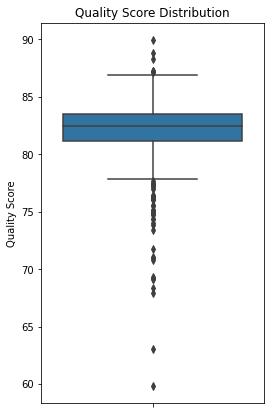

In [ ]:
# looking at basic features of quality score data after
stats = arabica_cleaned['Total.Quality.Score'].describe()
print (stats)

IQR = stats.values[6] - stats.values[4]
print ("\nIQR:", IQR)

# find outliers
bottom = stats.values[4] - 1.5*(IQR)
top = stats.values[6] + 1.5*(IQR)
outliers = 0
for points in arabica_cleaned['Total.Quality.Score']:
    if points < bottom:
      outliers+= 1
    elif points > top:
      outliers+= 1
print("Number of outliers: ", outliers, "\n")

# create quality score boxplot
plt.figure(figsize=(4,7))
g = sns.boxplot(y=arabica_cleaned['Total.Quality.Score'])
plt.ylabel('Quality Score')
_ = plt.title('Quality Score Distribution')

Since our focus revolves around the total quality score, we wanted to get a better grasp of this feature. We started by printing out some of its basic statistical information like its count, mean, median, min, and max. After cleaning, we had 897 data points left, which means that there is around 68% coverage of original data. The max score is 89.92, the min score is 59.83, and the median score is 82.42. 50% of the data is between a total quality score of 81.17 and 83.50 with an inner quartile range of 2.33.  This shows that the data is concentrated closely near the mean. We then plotted a box plot of the total quality score so that we could visualize the spread. We saw that there are 45 outliers.  We did not drop them because they were correctly entered and valid scores that affected results and assumptions, so it would not be valid to take this data out.

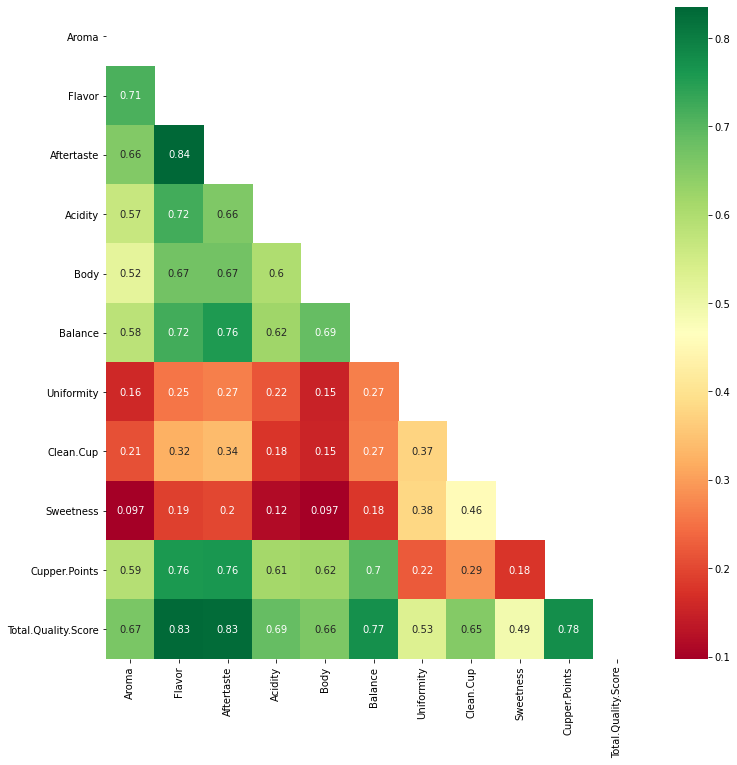

In [ ]:
# looking at correlation of 10 main numerical features and the total quality score with a heatmap
subset = arabica_cleaned[['Aroma', 'Flavor', 'Aftertaste', 'Acidity', 'Body', 'Balance', 'Uniformity', 'Clean.Cup', 'Sweetness', 'Cupper.Points', 'Total.Quality.Score']]
corrmat = subset.corr() # get correlations
mask = np.zeros_like(corrmat, dtype=np.bool) # cut heatmap in half since data repeats on both sides of diagonal
mask[np.triu_indices_from(mask)] = True
top_corr_features = corrmat.index

# create heatmap
plt.figure(figsize=(12,12))
g = sns.heatmap(subset[top_corr_features].corr(), mask = mask, annot=True, cmap="RdYlGn")

For this heatmap and the next couple of visualizations that show correlations, the Pearson correlation coefficient was used to find the correlation score. Although we started by using a pairgrid, we thought that the heatmap was easier to understand. This heatmap included the 10 flavor attributes that sum up to make the total quality score, and we wanted to see which of these attributes correlated the most with each other and correlated the most with the total quality score. Looking at the heatmap, the 3 attributes that have the least correlation with most of the other attributes were uniformity, clean cup, and sweetness. This is most likely because practically all of these attributes were scored as a 10 for most of the coffees. We found that the 2 attributes that were the most correlated with each other were flavor and aftertaste, which make sense because both have to do with the taste and aroma of the coffee. The attributes that were the least correlated with each other were sweetness and body, as well as sweetness and aroma. The top 2 attributes that were the most determinant of the total quality score were flavor and aftertaste, which we think makes sense because they are highly correlated with each other and it seems like flavor is a good indicator of whether coffee is good or not. The 2 attributes that were the least determinant of total quality score were sweetness and uniformity. This is most likely because these have high scores even when the other elements of the coffee may not score as high.

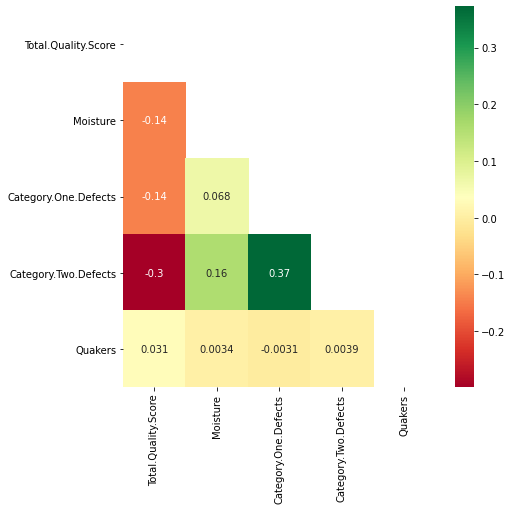

In [ ]:
# looking at correlation of negatively impactful numerical features and the total quality score with a heatmap
subset = arabica_cleaned[['Total.Quality.Score', 'Moisture', 'Category.One.Defects', 'Category.Two.Defects', 'Quakers']]
corrmat = subset.corr() # get correlations
mask = np.zeros_like(corrmat, dtype=np.bool) # cut heatmap in half since data repeats on both sides of diagonal
mask[np.triu_indices_from(mask)]= True
top_corr_features = corrmat.index

# create heatmap
plt.figure(figsize=(7,7))
g = sns.heatmap(subset[top_corr_features].corr(), mask = mask, annot=True, cmap="RdYlGn")

This second heatmap included features that we thought would most negatively correlate with total quality score. Looking at this heatmap, category 2 defects have the greatest negative impact on total quality score.  This makes sense because Category 2 defects are more common and less severe defects. Understandably, category 2 defects were positively correlated with category 1 defects which are less common but more severe. Category 1 defects and moisture were also found to have a slight negative correlate with total quality score. We were a little surprised to see that quakers did not have a negative correlation with quality like we expected, but instead had no correlation at all with total quality score.




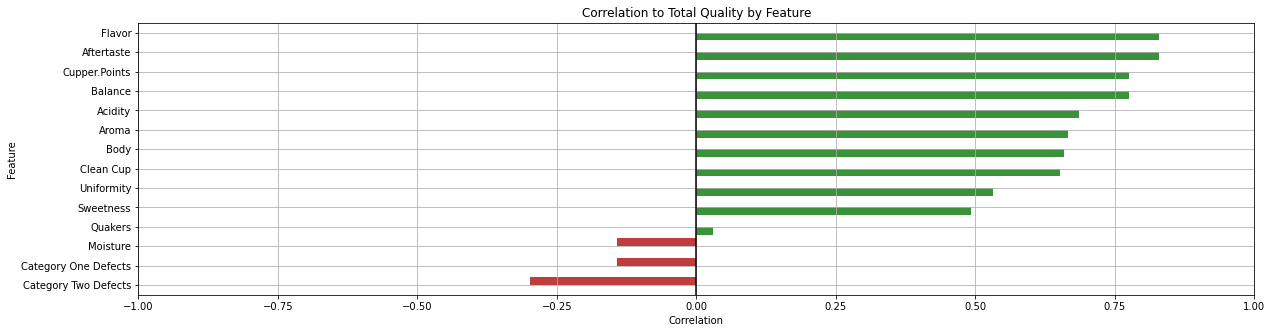

In [ ]:
# another way to visualize the correlation of the features in the above heatmaps with total quality score
subset = arabica_cleaned[['Aroma', 'Flavor', 'Aftertaste', 'Acidity', 'Body', 'Balance', 'Uniformity', 'Clean.Cup', 'Sweetness', 'Cupper.Points', 'Moisture', 'Category.One.Defects', 'Category.Two.Defects', 'Quakers', 'Total.Quality.Score']]
corrmat = subset.corr()

sorted = corrmat['Total.Quality.Score'].sort_values(kind="quicksort", ascending=False) # sort all the correlation scores
vals = sorted.values[1:] 
features = ['Flavor', 'Aftertaste', 'Cupper.Points', 'Balance', 'Acidity', 'Aroma',
       'Body', 'Clean Cup', 'Uniformity', 'Sweetness', 'Quakers', 'Moisture',
       'Category One Defects', 'Category Two Defects']
colors = [1 if c >= 0 else 0 for c in vals] # for color coding the negative vs postive correlations

# plot bar chart
plt.figure(figsize=(20,5))
g = sns.barplot(x=vals, y=features, ci=None, hue=colors, palette=['#d62728', '#2ca02c'])
plt.title('Correlation to Total Quality by Feature')
plt.xlabel('Correlation')
plt.ylabel('Feature')
g.grid(b=True, which='major')
g.grid(b=True, which='minor')
g.axvline(0, color='k')
plt.xlim(-1.0, 1.0)
g.legend().remove()

This bar chart summarizes the previous 2 heatmaps and shows the correlation with the various attributes and total quality score.  The attributes that were found to have negative correlation are colored in red and the attributes with a positive correlation are colored in green. The 10 flavor attributes highly correlate with the total quality score, which makes sense because these 10 scores sum to be the total quality score.  The negative correlations that we found with moisture, category 1 defects, and category 2 defects were not as strong.

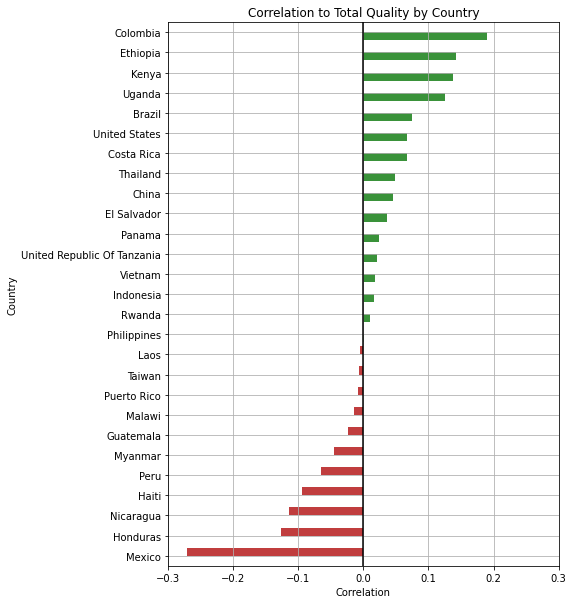

In [ ]:
# using similar bar chart style as above to show correlation among different countries and total quality score
subset = arabica_cleaned[['Total.Quality.Score']]
subset = pd.concat([pd.get_dummies(arabica_cleaned['Country.of.Origin'], prefix=''), subset], axis=1)
corrmat = subset.corr()

sorted = corrmat['Total.Quality.Score'].sort_values(kind="quicksort", ascending=False) # sort all the correlation scores
vals = sorted.values[1:]
features = ['Colombia', 'Ethiopia', 'Kenya', 'Uganda', 'Brazil',
       'United States', 'Costa Rica', 'Thailand', 'China', 'El Salvador',
       'Panama', 'United Republic Of Tanzania', 'Vietnam', 'Indonesia',
       'Rwanda', 'Philippines', 'Laos', 'Taiwan',
       'Puerto Rico', 'Malawi', 'Guatemala', 'Myanmar',
       'Peru', 'Haiti', 'Nicaragua', 'Honduras', 'Mexico']
colors = [1 if c >= 0 else 0 for c in vals] # for color coding the negative vs postive correlations

# plot bar chart
plt.figure(figsize=(7,10))
g = sns.barplot(x=vals, y=features, ci=None, hue=colors, palette=['#d62728', '#2ca02c'])
plt.title('Correlation to Total Quality by Country')
plt.xlabel('Correlation')
plt.ylabel('Country')
g.grid(b=True, which='major')
g.grid(b=True, which='minor')
g.axvline(0, color='k')
plt.xlim(-0.3, 0.3)
g.legend().remove()

These correlations aren't as large as those in the previous bar chart, but it we found that Mexico had the most negative correlation with total quality (by double of the second largest negative correlation).  Columbia, Ethopia, and Kenya and were found to have the highest correlation with total quality score.

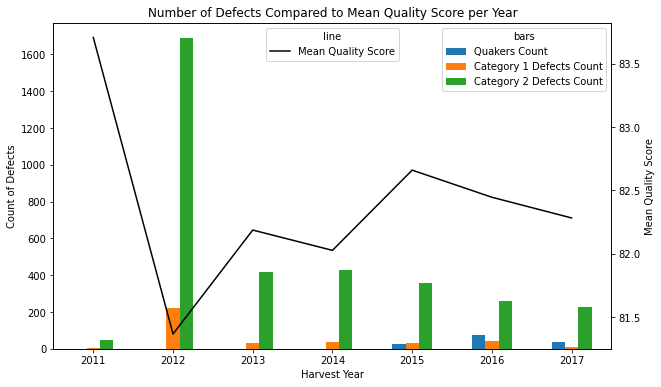

In [ ]:
# wanted to visualize the defects vs quality score mean per year
quakers_count = arabica_cleaned.groupby(arabica_cleaned['Harvest.Year'])['Quakers'].sum() # count quakers per year
quakers_count = quakers_count.sort_index(level=['Harvest.Year'])

cat1_count = arabica_cleaned.groupby(arabica_cleaned['Harvest.Year'])['Category.One.Defects'].sum() # count cat 1 defects per year
cat1_count = cat1_count.sort_index(level=['Harvest.Year'])

cat2_count = arabica_cleaned.groupby(arabica_cleaned['Harvest.Year'])['Category.Two.Defects'].sum() # count cat 2 defects per year
cat2_count = cat2_count.sort_index(level=['Harvest.Year'])

quality_mean = arabica_cleaned.groupby(arabica_cleaned['Harvest.Year'])['Total.Quality.Score'].mean() # find mean quality score per year
quality_mean = quality_mean.sort_index(level=['Harvest.Year'])

data = {'Quakers':quakers_count.values, 'Cat.1':cat1_count.values, 'Cat.2':cat2_count.values, 'Quality.Mean':quality_mean.values}
df = pd.DataFrame(data) 

# plot triple bar graph (defects) with line plot (quality score)
# used: https://stackoverflow.com/questions/38810009/matplotlib-plot-bar-and-line-charts-together
barWidth = 0.5
ax1 = df[['Quakers','Cat.1','Cat.2']].plot(kind='bar', width = barWidth, figsize=(10, 6))
plt.legend(['Quakers Count', 'Category 1 Defects Count', 'Category 2 Defects Count'], title='bars')
ax2 = df['Quality.Mean'].plot(secondary_y=True, color='k')
ax = plt.gca()
plt.xlim([-barWidth, len(df['Quakers'])-barWidth])
plt.legend(['Mean Quality Score'], title='line', loc = 'upper center')
_ = ax.set_xticklabels(['2011', '2012', '2013', '2014', '2015', '2016', '2017']),
plt.title('Number of Defects Compared to Mean Quality Score per Year')
ax1.set_xlabel('Harvest Year')
ax1.set_ylabel('Count of Defects')
_ = ax2.set_ylabel('Mean Quality Score')
plt.show()

This graph shows the defect counts (3 bar charts) along with the mean quality score (line graph) graphed over time. It should be noted that the count y-axis goes from 0 to 1600, while the quality score y-axis goes from 81 to 84. It can clearly be seen that the mean quality score decreased greatly from 2011 to 2012. We think this is because the amount of category 1 defects and category 2 defects skyrocketed in 2012. This means that the total quality score is inversely related to these defects, which makes sense, and we also found that other aspects are inversely related to the total quality score, like moisture.  However, this correlation gets weaker as the years progress, as seen in the graph from 2015 to 2017.

In [ ]:
# created t-SNE to help visualize data
# subset is the 10 flavor attributes and does not include the total score
subset = arabica_cleaned[['Aroma', 'Flavor', 'Aftertaste', 'Acidity', 'Body', 'Balance', 'Uniformity', 'Clean.Cup', 'Sweetness', 'Cupper.Points']]
X_embedded = TSNE(n_components=2, perplexity=10, n_iter=2500).fit_transform(subset)
tsne_df = pd.DataFrame({'X':X_embedded[:,0],'Y':X_embedded[:,1]})

t-Distributed Stochastic Neighbor Embedding (t-SNE) is a technique that is commonly used in data exploration to visualize high-dimensional data in order to get some intuition of how the data is arranged in the high-dimensional space. Since our data had many features, we decided to use t-SNE to perform dimensionality reduction so that we could more easily identify any trends or patterns within the internal structure of the data. Using the 10 flavor attributes from the dataset as inputs, we were hoping to find interesting insights about trends that may be present by coloring the output using other features within the dataset such as coffee varieties, coffee variety groups, region or country of origin, processing method, harvest year, altitude, etc. However, when we tried running t-SNE, graphing with a scatterplot, and grouping the output using the additional features in the dataset, we were only able to see very weak correlations and trends.

Even though we ran t-SNE many times and changed some of its parameters like perplexity, number of iterations, and learning rate, the output still only reflected weak patterns. Additionally, we also tried to make the visualization output clearer and easier to read by plotting datapoints using shapes as well as color. Despite these efforts, the t-SNE output didn’t become much easier to understand and still only revealed weak trends within the data. We considered performing clustering on the t-SNE output, but several online resources recommended not to do this and we realized it would’ve been hard to understand and interpret what the clustering results meant.

Included below are the best trends that we found. They include region, category one defects, and category two defects.  

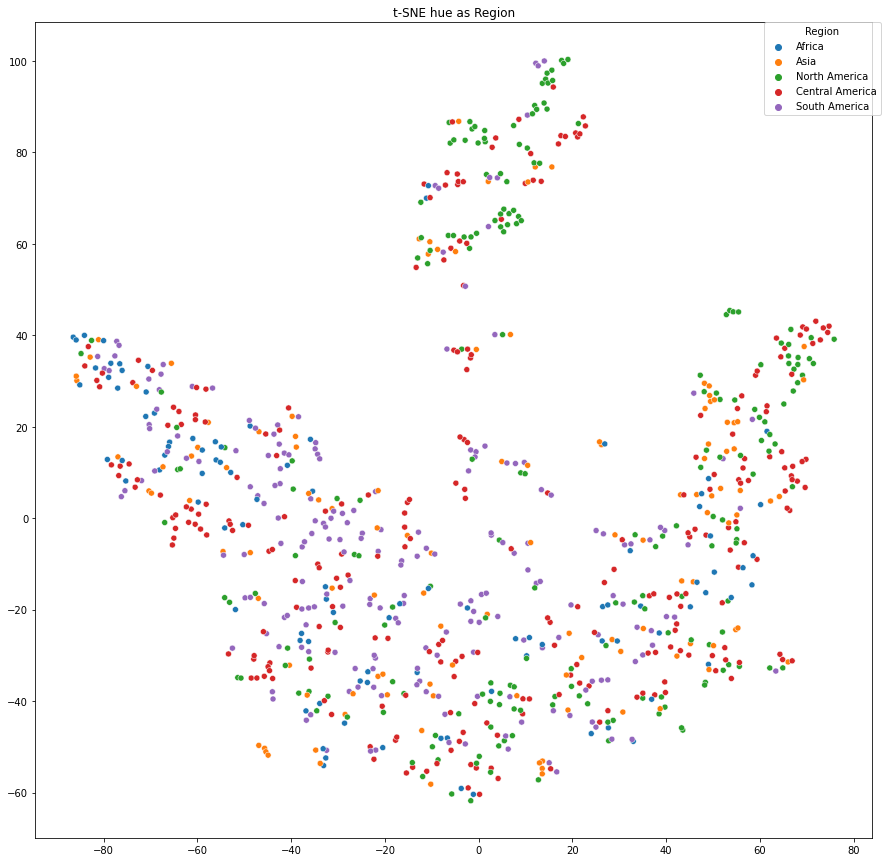

In [ ]:
# started plotting t-SNE and coloring different attributes
fig = plt.figure(figsize=(15,15))
sns.scatterplot(x="X", y="Y", data=tsne_df, hue=arabica_cleaned['Region']) # colored by region
_ = plt.legend(bbox_to_anchor=(1.01, 1), borderaxespad=0, title='Region')
_ = plt.title('t-SNE hue as Region')
_ = plt.xlabel('')
_ = plt.ylabel('')

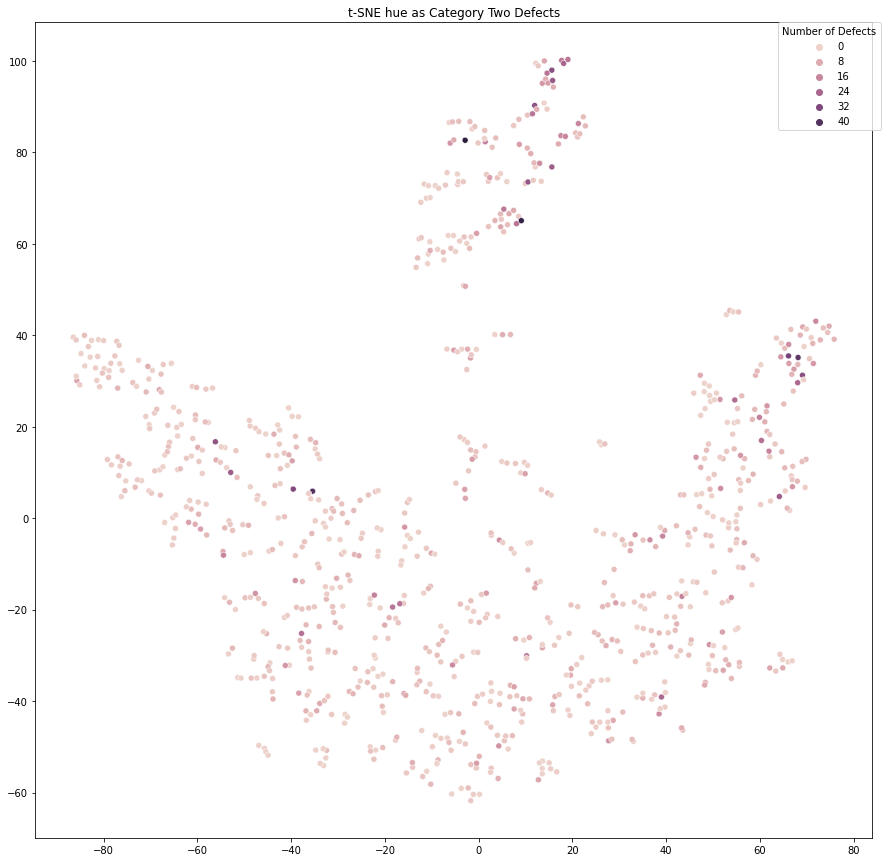

In [ ]:
fig = plt.figure(figsize=(15,15))
sns.scatterplot(x="X", y="Y", data=tsne_df, hue=arabica_cleaned['Category.Two.Defects']) # colored by category 1 defects
_ = plt.legend(bbox_to_anchor=(1.01, 1), borderaxespad=0, title='Number of Defects')
_ = plt.title('t-SNE hue as Category Two Defects')
_ = plt.xlabel('')
_ = plt.ylabel('')

# Final Analysis

One of the most important things we learned was that the distribution among our data was very small. This greatly impacted the rest of the analysis and what kinds of trends we were able to find. Using a heatmap, we identified a few correlations in the data between the flavor attributes of coffee. The strongest correlation was between flavor and aftertaste. The weakest correlations were between sweetness and body, and sweetness and aroma. The countries that had the best coffee quality scores were Columbia, Ethiopia, and Kenya, while the countries with the worst coffee quality scores were Mexico, Honduras, and Nicaragua. Those results are inline with the finding that the regions of Africa and South America produce coffee with the highest average quality scores and the regions of North America and Central America produce coffee with the lowest average quality scores.

 After doing some research about coffee, we expected that the processing method and altitude features in our dataset would be key features which could be used to find trends, and would have a strong impact on the quality scores of coffee. As we performed the analysis, we were surprised to learn that this was not the case. In general, it seemed like the processing method and altitude had very little effect on the final quality scores. Additionally, we found that the year 2012 was the worst year for high quality coffee since it had the lowest average coffee quality scores. This makes sense because the data also showed that the coffee beans in 2012 had a much larger number of defects than were present in the other years. Therefore, the increased number of defects is probably the reason for the lower quality scores that year.

By running t-SNE many times using different parameters, and plotting the output using colors and shapes, we were able to find some weak correlations. We expected trends related to the countries and varieties, but they were hard to identify due to the number of different countries and varieties. We then used regions and variety groups instead to reduce the complexity of the t-SNE output and were able to see some weak trends related to the regions. We also saw that category 2 defects were not tightly clustered, but there seemed to be some pockets of higher amounts of defects in the t-SNE scatterplot.


# Presentation

The following data vizualizations are the ones that we determined contained the most useful information and were the ones that we were able to gather some insights from.

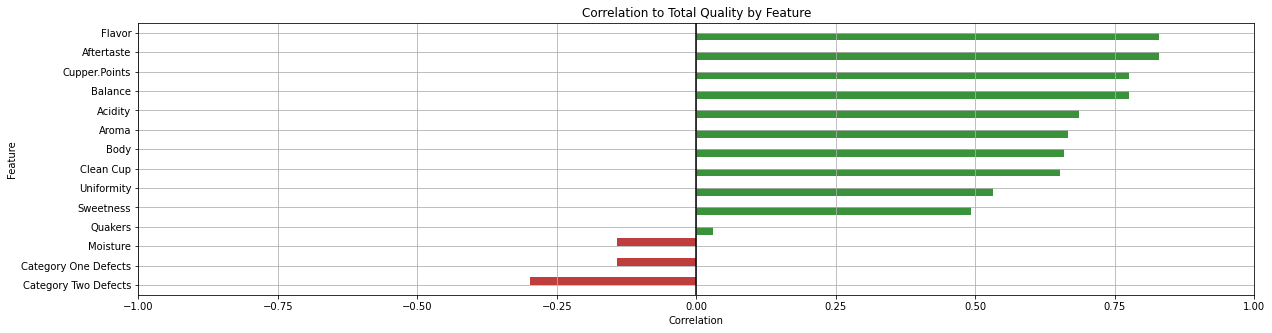

From this chart we can see that the 10 flavor attributes correlate highly to total quality. The things that negatively correlate with total quality are moisture and category one and two defects, but this is not as strong of a correlation.  Considering how high the flavor and aftertaste correlation scores are, it is the most important to those who buy the coffee beans to focus on making sure flavor is high even if it has some defects, as the higher flavor will likely make up for the defects. Farmers need to focus on things that bring up flavor more than reducing defects, as the effects will be greater. Additionally, consumers should try and choose coffees that have good flavors and aftertastes.

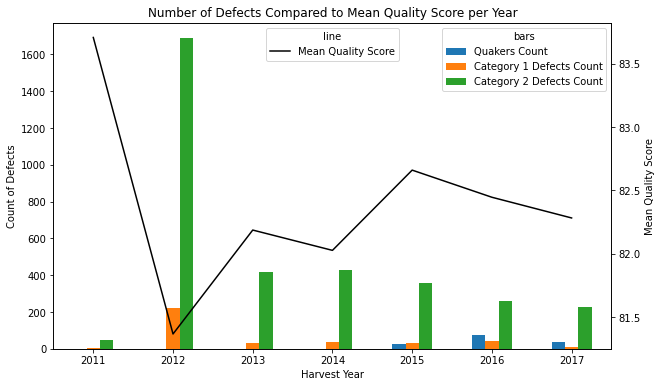
For each year, this graph shows the relationship between the number of defects in coffee and the mean quality score of coffee. There seems to be a strong negative correlation between the amount of defects and the mean quality score in 2012, but this relationship doesn’t really hold for some later years. Using this information, we can conclude that more focus and attention should be placed on the flavor attributes of coffee rather than the defects since they seem to have a smaller impact on the quality scores in general. This may help people who grow coffee to adjust their coffee growing conditions based on how they will positively affect the flavor attributes of coffee, rather than worrying about which growing conditions will result in the least amount of defects in the coffee. However, the amount of defects should try to be kept to a minimum whenever possible.

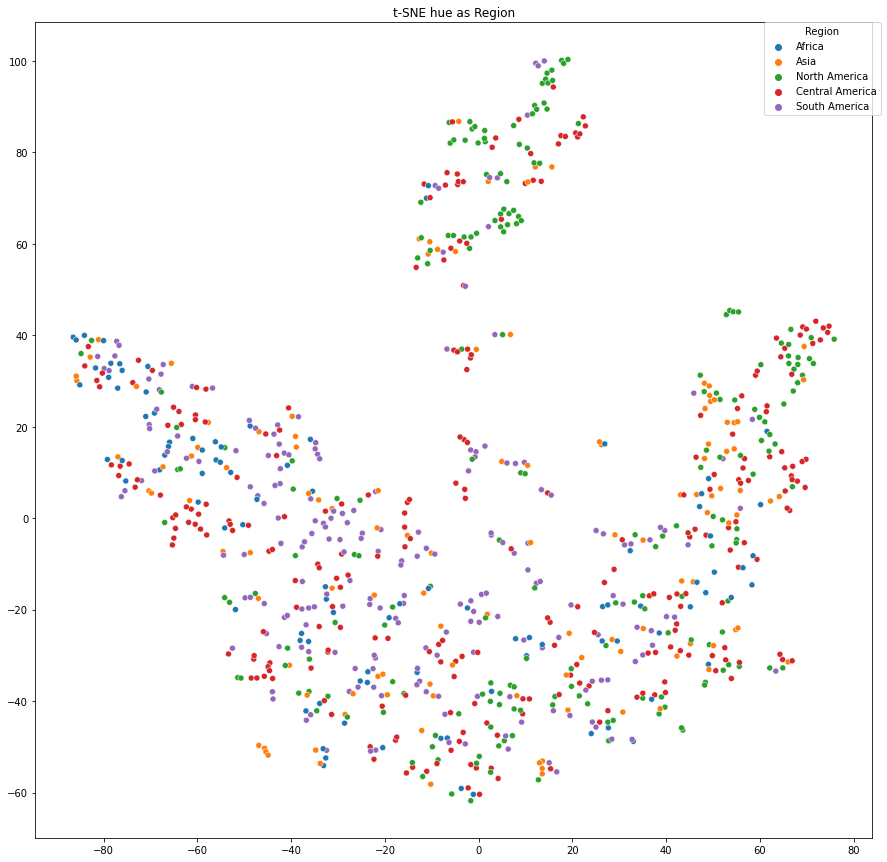

This is a version from the result of a t-SNE dimensionality reduction.  t-SNE is a nondeterministic algorithm that shows different outputs even with the same input. In this output, Asia and Central America are evenly distributed. North America is more densely populated in the top cluster and the right side of the bottom cluster. Africa and South America are both denser on the left. This makes sense as they both include countries with coffee that have high overall ratings and North America which has the lowest rated coffee is kind of the opposite being on the top and right instead of the left.  

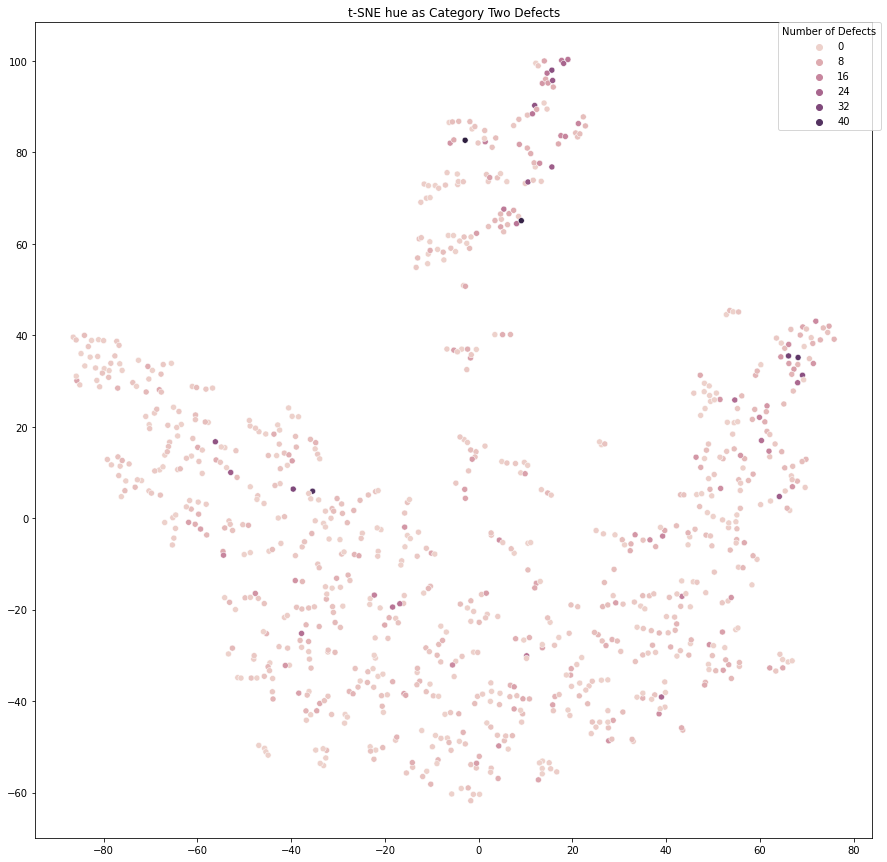

This is another version of the same t-SNE which is colored with the number of category two defects. The density of defects in the top cluster and at the tip of the right wing are higher than throughout the rest of the plot. This shows that there is some correlation between category two defects and the points that they receive, but the correlation is still very weak.
